In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
!ls -lah accuracy.h5

-rw-r--r--  1 nipunbatra  staff   434K Feb  6 16:49 accuracy.h5


In [68]:
accuracy_store = pd.HDFStore("accuracy.h5")

In [69]:
accuracy_store

<class 'pandas.io.pytables.HDFStore'>
File path: accuracy.h5
/FHMM                        wide_table   (typ->appendable,nrows->510,ncols->6,indexers->[major_axis,minor_axis])
/LBM                         wide_table   (typ->appendable,nrows->510,ncols->6,indexers->[major_axis,minor_axis])
/N-NILM                      wide_table   (typ->appendable,nrows->420,ncols->6,indexers->[major_axis,minor_axis])
/Regional average            wide_table   (typ->appendable,nrows->445,ncols->6,indexers->[major_axis,minor_axis])

In [70]:
appliance_name_map = {"fridge":"Fridge","hvac":"HVAC","wm":"Washing\nmachine",
                      "dr":"Dryer","dw":"Dish\nwasher","light":"Lights"}

In [71]:
means = {}
sems = {}
for approach in ["FHMM","LBM","Regional average","N-NILM"]:

    fr = accuracy_store[approach]
    means[approach]={}
    sems[approach] = {}

    for appliance in ['hvac','fridge','dw','dr','light','wm']:
        if appliance=="hvac":
            start, stop=5, 11
        else:
            start, stop=1, 13
        temp = fr[appliance]
        
        means[approach][appliance_name_map[appliance]] = temp.ix[range(start,stop)].mean().mean()
        sems[approach][appliance_name_map[appliance]] = temp.ix[range(start,stop)].mean().sem()

In [72]:
main_df = pd.DataFrame(means)
se = pd.DataFrame(sems)

In [73]:
main_df = main_df.ix[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']]
se_df =se.ix[['HVAC','Fridge','Washing\nmachine','Lights','Dryer','Dish\nwasher']]

In [74]:
from common_functions import latexify, format_axes

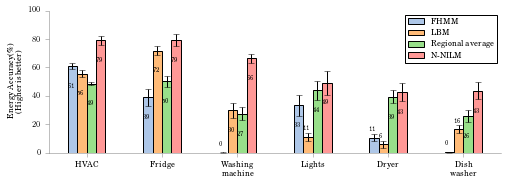

In [80]:
latexify(columns=2, fig_height=2.6)

tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

main_df[["FHMM","LBM","Regional average","N-NILM"]].plot(kind="bar",yerr=se_df,rot=0, colors=tableau20blind[1:][::2])
plt.ylim((0,100))
plt.ylabel("Energy Accuracy(\%)\n(Higher is better)");
format_axes(plt.gca())
ax = plt.gca()
for p in ax.patches:
    if p.get_height()<20:
        color="black"
        offset=5
    else:
        color="black"
        offset=-15
    ax.annotate(str(int(round(p.get_height(),0))), (p.get_x(), p.get_height() +offset), color=color, fontsize=6)
plt.tight_layout()
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/main.pdf",bbox_inches="tight")
plt.savefig("/Users/nipunbatra/git/monthly-disaggregation/results/main.png",bbox_inches="tight")

In [65]:
main_df[["FHMM","LBM","Regional average","N-NILM"]]

,FHMM,LBM,Regional average,N-NILM
HVAC,61.039103,55.722782,48.698197,79.075470
Fridge,38.975759,71.822239,50.157783,79.253608
Washing\nmachine,0.130659,29.972193,27.360420,66.443781
Lights,33.414945,11.290612,43.866968,49.357385
Dryer,10.529382,5.940615,39.250599,42.786897
Dish\nwasher,0.430750,16.495110,25.787515,43.469454


In [18]:
main_df[["FHMM","LBM","Regional average","N-NILM"]]

,FHMM,LBM,Regional average,N-NILM
HVAC,61.039103,55.722782,48.698197,79.075470
Fridge,38.975759,71.822239,50.157783,79.253608
Washing\nmachine,0.130659,29.972193,27.360420,66.443781
Lights,33.414945,11.290612,43.866968,49.357385
Dryer,10.529382,5.940615,39.250599,42.786897
Dish\nwasher,0.430750,16.495110,25.787515,43.469454
